# 03 — RQ3: Early Acceptance Signals in AI-Generated Pull Requests

This notebook reproduces the complete analysis pipeline for **RQ3**.

It performs:
- Loading PR + commit details from AIDev dataset
- Feature engineering (description length, churn, test presence, files changed)
- Outlier clipping for visualization
- ACM-style log-scale boxplot visualization
- Mann–Whitney U statistical significance tests
- Saving all CSV outputs
- Displaying all figures

Heavy logic is implemented in:
```
msr2026/rq3/run_rq3.py
```

## 1. Import & Setup

In [1]:
import sys, os
sys.path.append("../src")

from src.msr2026.rq3.run_rq3 import run_rq3

import pandas as pd
from IPython.display import Image, display

print("Environment ready.")

Environment ready.


## 2. Run the RQ3 pipeline

This step:
- Computes PR-level behavioral features
- Saves CSV files
- Generates all plots

Output folders:
```
output/tables/RQ3/
output/figures/RQ3/
```

In [2]:
run_rq3()
print("✔ RQ3 pipeline completed.")


===================== Running RQ3 =====================
Loading RQ3 data from HuggingFace...
Computing RQ3 features...

=========== RQ3 Summary Table (Median & IQR) ===========
               Reject_median  Reject_IQR  Accept_median  Accept_IQR
desc_length            724.0     1866.75          353.0       314.0
churn                  160.0      601.00           79.0       247.0
files_changed            4.0        8.00            3.0         7.0
is_test                  0.0        1.00            0.0         1.0


===== Statistical Significance Tests (RQ3) =====
desc_length    : U=1.5201e+08, p=0.0000
churn          : U=1.3543e+08, p=0.0000
files_changed  : U=1.2655e+08, p=0.0000
is_test        : U=1.1256e+08, p=0.0002
✔ RQ3 completed — Figures saved to: ../output/figures/RQ3
✔ CSV tables saved to: ../output/tables/RQ3
✔ RQ3 pipeline completed.


## 3. Load CSV Outputs

RQ3 produces four output tables:

- **rq3_features_raw.csv** — Full engineered feature table containing
  description length, churn, number of files changed, test presence, and
  acceptance label for each PR.

- **rq3_features_clipped.csv** — Same as the raw table, but with extreme
  outliers capped at the 99th percentile for cleaner visualization.

- **rq3_summary_table.csv** — Median and IQR summary of each feature
  split by accepted vs. rejected PRs.

- **rq3_mannwhitney_tests.csv** — Mann–Whitney U test results comparing
  accepted and rejected PRs for each early-feature signal.



In [7]:
import pandas as pd
from IPython.display import display

TABLE_DIR = "../output/tables/RQ3/"

raw_features = pd.read_csv(TABLE_DIR + "rq3_features_raw.csv")
clipped_features = pd.read_csv(TABLE_DIR + "rq3_features_clipped.csv")
summary = pd.read_csv(TABLE_DIR + "rq3_summary_table.csv")
tests = pd.read_csv(TABLE_DIR + "rq3_mannwhitney_tests.csv")

print("=== Raw Feature Table (head) ===")
display(raw_features.head())

print("\n=== Clipped Feature Table (head) ===")
display(clipped_features.head())

print("\n=== Summary Table (Median & IQR) ===")
display(summary)

print("\n=== Mann–Whitney Test Results ===")
display(tests)


=== Raw Feature Table (head) ===


,pr_id,agent,accepted,desc_length,churn,files_changed,is_test
0,3264933329,Claude_Code,0,1928,396.0,3.0,1.0
1,3265118634,Claude_Code,1,649,76.0,11.0,0.0
2,3265640341,Claude_Code,1,4516,407.0,5.0,0.0
3,3265709660,Claude_Code,1,2222,300.0,15.0,0.0
4,3265782173,Claude_Code,0,327,221.0,21.0,1.0



=== Clipped Feature Table (head) ===


,pr_id,agent,accepted,desc_length,churn,files_changed,is_test
0,3264933329,Claude_Code,0,1928.0,396.0,3.0,1.0
1,3265118634,Claude_Code,1,649.0,76.0,11.0,0.0
2,3265640341,Claude_Code,1,4516.0,407.0,5.0,0.0
3,3265709660,Claude_Code,1,2222.0,300.0,15.0,0.0
4,3265782173,Claude_Code,0,327.0,221.0,21.0,1.0



=== Summary Table (Median & IQR) ===


,Unnamed: 0,Reject_median,Reject_IQR,Accept_median,Accept_IQR
0,desc_length,724.0,1866.75,353.0,314.0
1,churn,160.0,601.00,79.0,247.0
2,files_changed,4.0,8.00,3.0,7.0
3,is_test,0.0,1.00,0.0,1.0



=== Mann–Whitney Test Results ===


,feature,U_value,p_value
0,desc_length,152014666.0,0.000000e+00
1,churn,135434546.0,2.763219e-142
2,files_changed,126548770.5,1.666592e-47
3,is_test,112556705.0,2.415459e-04


## 4. Show Generated Figures
The RQ3 pipeline produces:
- Log boxplot figure (`rq3_features.png` / `.pdf`)

- rq3_features.png


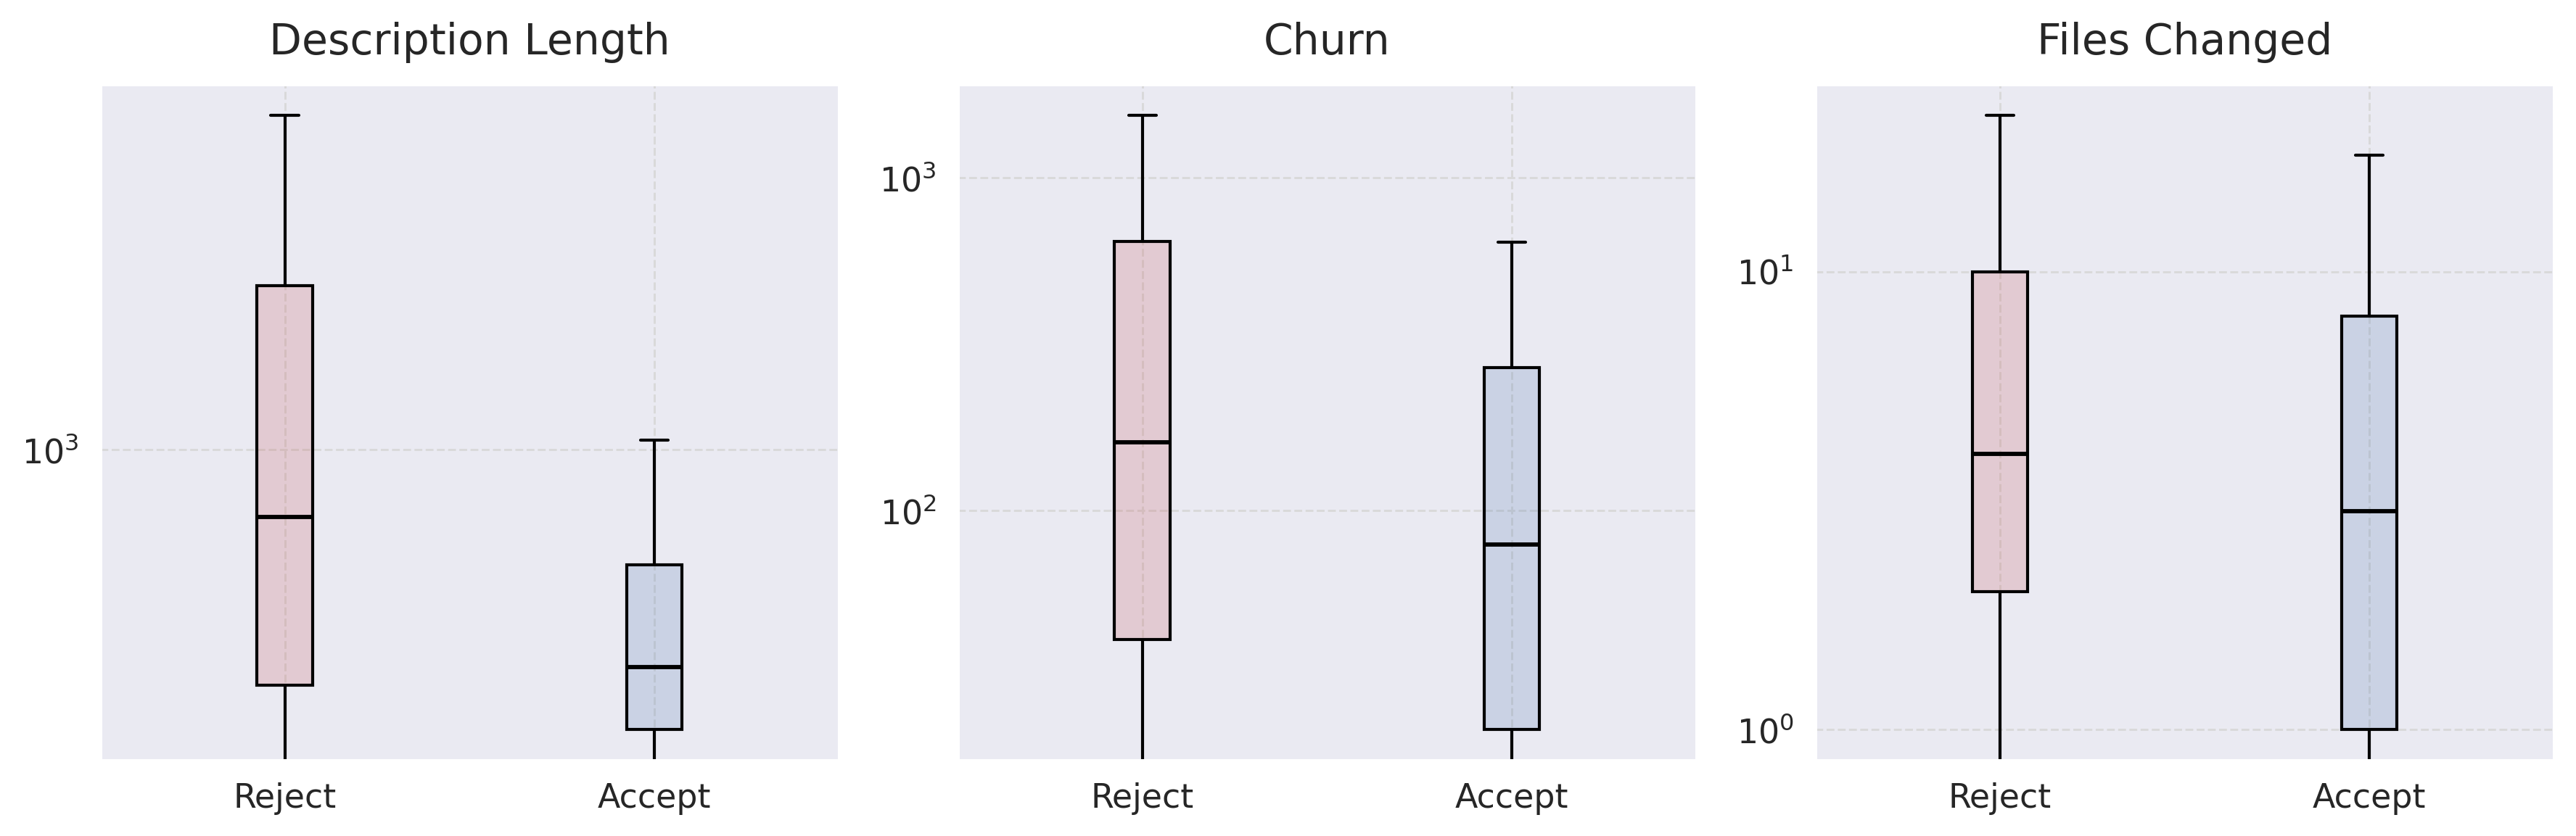

In [6]:
FIG_DIR = "../output/figures/RQ3/"

for f in os.listdir(FIG_DIR):
    if f.endswith(".png"):
        print("-", f)
        display(Image(filename=os.path.join(FIG_DIR, f)))